In [2]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt 
#!pip install seaborn
import seaborn as sns
import string
#!pip install nltk
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
df = pd.read_csv('train_tweets.csv',encoding = 'latin',names=["target","id","date","Query","user","tweet"])

In [4]:
df.loc[:,'tweet']= df.loc[:,'tweet'].str.lower()

In [1]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [5]:
df.head()

,target,id,date,Query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
#Partir el dataset
df.head()
df1 = df.loc[:399999,:]
df2 = df.loc[400000:799999,:]
df3 = df.loc[800000:1199999,:]
df4 = df.loc[1200000:,:]
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(400000, 6)
(400000, 6)
(400000, 6)
(400000, 6)


In [7]:
#Metodo que remueve un patrón usado para quitar las menciones @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)    
    return input_txt 

In [8]:
#Se elminan las menciones del dataset
df1.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df1['tweet'], "@[\w]*")

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
df2.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df2['tweet'], "@[\w]*")
df3.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df3['tweet'], "@[\w]*")
df4.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df4['tweet'], "@[\w]*")

In [10]:
#Se remueven las url
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("'","")

In [11]:
#Se remueven las url
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("'","")

In [12]:
#Se remueven las url
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("'","")

In [13]:
#Se remueven las url
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("'","")

In [14]:
df1

,target,id,date,Query,user,tweet,preprocess
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving mad see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@loltrish hey long time no see! yes.. rains a...,hey long time see yes rains bit bit lol fine t...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@tatiana_k nope they didn't have it,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que muera


In [15]:
frames = [df1,df2,df3,df4]
df_total = pd.concat(frames)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
target        1600000 non-null int64
id            1600000 non-null int64
date          1600000 non-null object
Query         1600000 non-null object
user          1600000 non-null object
tweet         1600000 non-null object
preprocess    1600000 non-null object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [21]:
df_total.loc[800000:,"target"]= 1
df_total

,target,id,date,Query,user,tweet,preprocess
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving mad see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@loltrish hey long time no see! yes.. rains a...,hey long time see yes rains bit bit lol fine t...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@tatiana_k nope they didn't have it,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que muera


In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df_total['preprocess'][df_total['target'] == 0])


# unnesting list
HT_regular = sum(HT_regular,[])


In [26]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df_total['preprocess'][df_total['target'] == 4])
HT_negative = sum(HT_negative,[])

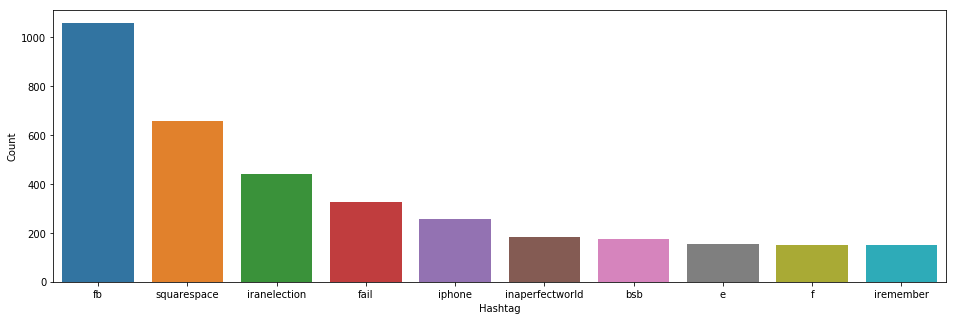

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

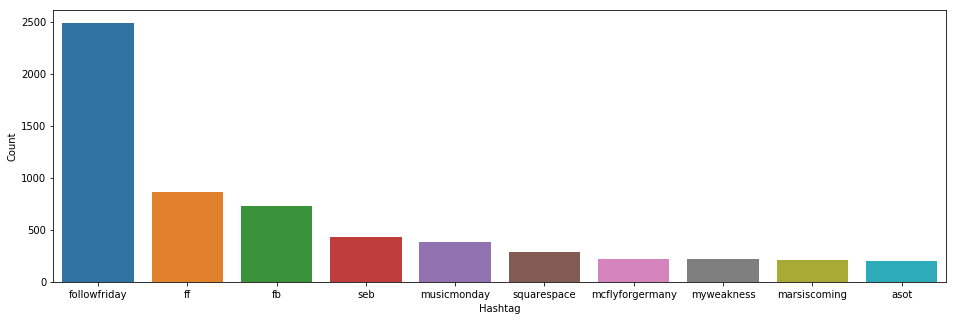

In [27]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_total['preprocess'])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# splitting data into training and test set
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, df_total['target'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xtest_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) # calculating f1 score

0.74831838659212613

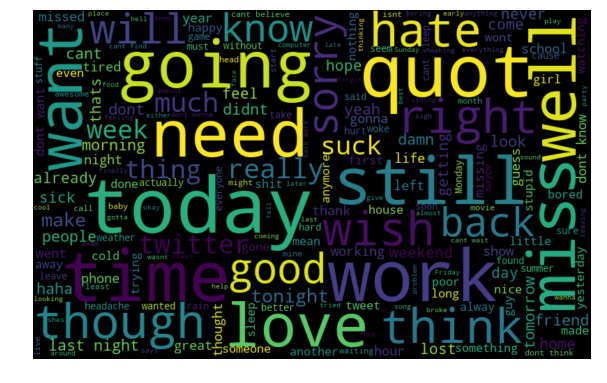

In [25]:
normal_words =' '.join([text for text in df_total.loc[:,'preprocess'][df1['target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
normal_words =' '.join([text for text in df_total.loc[:,'preprocess'][df1['target'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.